In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
train_dir = 'Surya Namaskara'

In [3]:
Name=[]
for file in os.listdir(train_dir):
    Name+=[file]
print(Name)
print(len(Name))

['adho mukha svanasana', 'ashtanga namaskara', 'ashwa sanshalasana', 'bhujangasana', 'chaturanga dandasana', 'hasta uttasana', 'padahastasana', 'pranamasana']
8


In [4]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [5]:
dataset=[]
testset=[]
count=0
for file in os.listdir(train_dir):
    t=0
    path=os.path.join(train_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(160,160))
        image=img_to_array(image)
        image=image/255.0
        if t<60:
            dataset+=[[image,count]]
        else:
            testset+=[[image,count]]
        t+=1
    count=count+1

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [7]:
labels1=to_categorical(labels0)
labels=np.array(labels1)

In [8]:
data=np.array(data)
test=np.array(test)

In [9]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [10]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(302, 160, 160, 3)
(76, 160, 160, 3)
(302, 8)
(76, 8)


In [11]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,zoom_range=0.2,
                       fill_mode="nearest")

In [12]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(160,160,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [13]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(8, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
10/10 [==============================] - 36s 3s/step - loss: 2.0331 - accuracy: 0.2264 - val_loss: 1.4262 - val_accuracy: 0.5000
Epoch 2/30
10/10 [==============================] - 22s 2s/step - loss: 1.1957 - accuracy: 0.6114 - val_loss: 0.9740 - val_accuracy: 0.6053
Epoch 3/30
10/10 [==============================] - 22s 2s/step - loss: 0.7646 - accuracy: 0.7608 - val_loss: 1.1368 - val_accuracy: 0.5921
Epoch 4/30
10/10 [==============================] - 22s 2s/step - loss: 0.4978 - accuracy: 0.8695 - val_loss: 0.8356 - val_accuracy: 0.6184
Epoch 5/30
10/10 [==============================] - 23s 2s/step - loss: 0.4384 - accuracy: 0.8821 - val_loss: 0.7686 - val_accuracy: 0.7105
Epoch 6/30
10/10 [==============================] - 23s 2s/step - loss: 0.3228 - accuracy: 0.9019 - val_loss: 0.7040 - val_accuracy: 0.7105
Epoch 7/30
10/10 [==============================] - 23s 2s/step - loss: 0.2153 - accuracy: 0.9568 - val_loss: 0.6851 - val_accuracy: 0.7763
Epoch 8/30
10/10 [==

In [16]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.62      1.00      0.77         5
           2       0.43      0.60      0.50         5
           3       0.70      0.58      0.64        12
           4       0.85      0.65      0.73        17
           5       1.00      0.50      0.67         6
           6       0.80      1.00      0.89         8
           7       0.92      1.00      0.96        11

    accuracy                           0.79        76
   macro avg       0.78      0.79      0.76        76
weighted avg       0.81      0.79      0.78        76



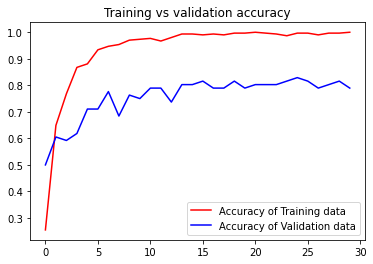

<Figure size 432x288 with 0 Axes>

In [17]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

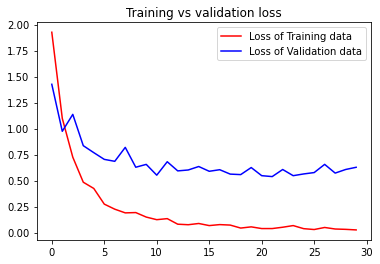

<Figure size 432x288 with 0 Axes>

In [18]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

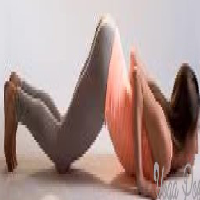

In [20]:
path0="28-0.png"
load_img(path0,target_size=(200,200))

In [21]:
image=load_img(path0,target_size=(160,160))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [22]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is ashtanga namaskara.


In [23]:
VideoCapture = cv2.VideoCapture(0)

while True:
    _,img = VideoCapture.read()
    image=cv2.resize(img,(160,160), interpolation=cv2.INTER_NEAREST)
    image=img_to_array(image) 
    image=image/255.0
    prediction_image=np.array(image)
    prediction_image= np.expand_dims(image, axis=0)
    prediction=model.predict(prediction_image)
    value=np.argmax(prediction)
    move_name=mapper(value)
    color = (255, 0, 0)
    cv2.putText(img, move_name, (50,50),cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2, cv2.LINE_AA)
    cv2.imshow("prediction",img)
    
    if cv2.waitKey(1) & 0xFF == ord('e'):
        break

VideoCapture.release()
cv2.destroyAllWindows()

In [29]:
VideoCapture = cv2.VideoCapture(0)
i = 0
while True:
    _,img = VideoCapture.read()
    image=cv2.resize(img,(x,y), interpolation=cv2.INTER_NEAREST)
    if i <= 750:
        move_name="adho mukha" + str(i)
        color = (0, 255, 0)
        cv2.putText(img, move_name, (50,50),cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2, cv2.LINE_AA)

    elif i < 1250:
        move_name="adho mukha on record"  + str(i)
        color = (255, 0, 0)
        cv2.imwrite("Data/Adho Mukha Svanasana." + str(i) + ".png", img)
        cv2.putText(img, move_name, (50,50),cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2, cv2.LINE_AA)
    
    else:
        VideoCapture.release()
        cv2.destroyAllWindows()
    
    i += 1
    
    cv2.imshow("camera",img)
    
    if cv2.waitKey(1) & 0xFF == ord('e'):
        break

VideoCapture.release()
cv2.destroyAllWindows()

In [25]:
VideoCapture.release()
cv2.destroyAllWindows()